## Data Cleaning Customer Demographic

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
from datetime import datetime, date
plt.style.use('ggplot')

In [3]:
import pandas as pd

# Specify the path to your Excel file
file_path = r'C:\Users\Dhir\OneDrive\Desktop\DATA ANALYTICS\PYTHON PROJECT\Customer Segmentation\Raw_data.xlsx'

# Specify the sheet name and the date column
sheet_name = 'CustomerDemographic'
date_column = 'DOB'  # Replace with your actual date column name if different

# Load the data with explicit date parsing
df = pd.read_excel(file_path, sheet_name=sheet_name, parse_dates=[date_column])

# Display the first few rows to verify the data
print(df.dtypes)  # Check the data types to ensure 'DOB' is parsed as datetime



customer_id                              int64
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
default                                 object
owns_car                                object
tenure                                 float64
dtype: object


In [4]:
#Checking first 5 records from the customer demographics data
df.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [5]:
#Information of columns and data-types of Customer Demographic data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

The data-type of columns looks fine. However here default is an irrelevent column which should be dropped / deleted from the dataset. Let's check for the data quality and apply data cleaning process where ever applicable to clean our dataset before performing any analysis.

### Total Records

In [6]:
print("Total records(rows) in the dataset :{}".format(df.shape[0]))
print("Total columns(features) in the dataser:{}".format(df.shape[1]))

Total records(rows) in the dataset :4000
Total columns(features) in the dataser:13


### Numeric Columns and Non-Numeric Column

In [7]:
#Select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are :{}".format(numeric_cols))

#Select Non-numeric columns
df_non_numeric = df.select_dtypes(exclude = [np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The Non Numeric columns are :{}".format(non_numeric_cols))

The numeric columns are :['customer_id' 'past_3_years_bike_related_purchases' 'tenure']
The Non Numeric columns are :['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'default'
 'owns_car']


### 1.Dropping Ireelevent Columns

##### default is an irrelevent column.Hence it should be dropped.

In [8]:
#Dropping the default column
df.drop(labels={'default'},axis = 1,inplace= True)

### 2. Missing Values Check

Checking for the presence of any missing values in the dataset. If missing values are present for a particular feature then depending upon the situation the feature may be either dropped (cases when a major amount of data is missing) or an appropiate value will be imputed in the feature column with missing values.

In [9]:
#Total number of missing values
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [10]:
#percentage of missing values
df.isnull().mean()*100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

Here it is observed that columns like gender, DOB, job_title, job_industry_category and tenure have missing values.

#### 2.1 Last Name

In [11]:
#Checking for the presence of first name and customer if in records where last name is missing.
df[df['last_name'].isnull()][['first_name','customer_id']].isnull().sum()

first_name     0
customer_id    0
dtype: int64

Since All customers have a customer_id and First name, all the customers are identifiable. Hence it is okay for to not have a last name. Filling null last names with "None".

In [12]:
#Fetching record where last name is missing.
df[df['last_name'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7.0
66,67,Vernon,NaN,Male,67,1960-06-14 00:00:00,Web Developer II,Retail,Mass Customer,N,No,18.0
105,106,Glyn,NaN,Male,54,1966-07-03 00:00:00,Software Test Engineer III,Health,High Net Worth,N,Yes,18.0
138,139,Gar,NaN,Male,1,1964-07-28 00:00:00,Operator,Telecommunications,Affluent Customer,N,No,4.0
196,197,Avis,NaN,Female,32,1977-01-27 00:00:00,NaN,NaN,High Net Worth,N,No,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3884,3885,Asher,NaN,Male,55,1978-06-17 00:00:00,Actuary,Financial Services,Mass Customer,N,Yes,8.0
3915,3916,Myrtia,NaN,Female,31,1958-10-17 00:00:00,NaN,Retail,Affluent Customer,N,Yes,17.0
3926,3927,Conway,NaN,Male,29,1978-01-07 00:00:00,Electrical Engineer,Manufacturing,Mass Customer,N,Yes,7.0
3961,3962,Benoit,NaN,Male,17,1977-10-06 00:00:00,Project Manager,Argiculture,High Net Worth,N,Yes,14.0


In [13]:
df['last_name'].fillna('None',axis=0, inplace=True)

In [14]:
df['last_name'].isnull().sum()

0

#### 2.2 Date of Birth

In [15]:
df[df['DOB'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaN,Environmental Tech,IT,Mass Customer,N,No,NaN
167,168,Reggie,Broggetti,U,8,NaN,General Manager,IT,Affluent Customer,N,Yes,NaN
266,267,Edgar,Buckler,U,53,NaN,NaN,IT,High Net Worth,N,No,NaN
289,290,Giorgio,Kevane,U,42,NaN,Senior Sales Associate,IT,Mass Customer,N,No,NaN
450,451,Marlow,Flowerdew,U,37,NaN,Quality Control Specialist,IT,High Net Worth,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaN,NaN,IT,Affluent Customer,N,No,NaN
3882,3883,Nissa,Conrad,U,35,NaN,Legal Assistant,IT,Mass Customer,N,No,NaN
3930,3931,Kylie,Epine,U,19,NaN,NaN,IT,High Net Worth,N,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaN,NaN,IT,High Net Worth,N,Yes,NaN


In [16]:
round(df['DOB'].isnull().mean()*100)

2

##### Since less than 5% of data has null date of birth.We can remove the records where date of birth is null.

In [17]:
dob_index_drop = df[df['DOB'].isnull()].index
dob_index_drop

Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,  581,
        598,  679,  684,  798,  838,  882,  891,  949,  974,  982,  995, 1037,
       1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582, 1627, 1682, 1739,
       1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020, 2068, 2164, 2204, 2251,
       2294, 2334, 2340, 2413, 2425, 2468, 2539, 2641, 2646, 2695, 2696, 2853,
       2919, 2962, 2998, 3011, 3085, 3150, 3221, 3222, 3254, 3287, 3297, 3311,
       3321, 3342, 3364, 3472, 3509, 3512, 3564, 3653, 3717, 3726, 3778, 3882,
       3930, 3934, 3997],
      dtype='int64')

In [18]:
df.drop(index = dob_index_drop, inplace = True, axis =0)

In [19]:
df['DOB'].isnull().sum()

0

Currently there are no missing values for DOB column.

### Creating Age Column for checking further descripency in data


In [23]:
# Convert Dob column to datetime
data = df
df = pd.DataFrame(data)

# Convert the 'DOB' column to datetime
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce', infer_datetime_format=True)

C:\Users\Dhir\AppData\Local\Temp\ipykernel_10788\2832606041.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce', infer_datetime_format=True)


In [24]:
# Function to calculate the age as of today based on the DOB of the customer.
def age(born):
    today = date.today()
    
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['Age'] = df['DOB'].apply(age)

    
    
    

<Axes: xlabel='Age', ylabel='Count'>

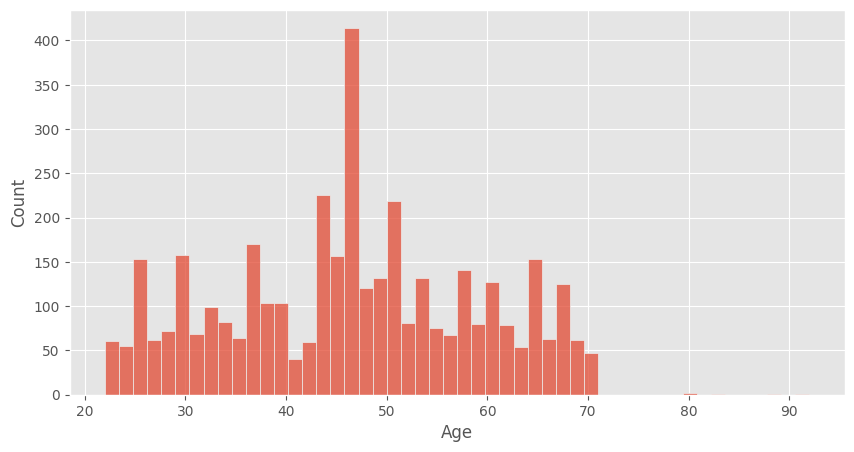

In [25]:
# Viz to find out the Age Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], kde=False, bins=50)

In [26]:
df['Age'].describe()


count    3912.000000
mean       46.400051
std        12.620464
min        22.000000
25%        37.000000
50%        46.000000
75%        56.000000
max        92.000000
Name: Age, dtype: float64

In [69]:
df[df['Age'] > 100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,180


In [70]:
age_index_drop = df[df['Age']>100].index

df.drop(index=age_index_drop, inplace=True , axis=0)

### 2.3 Tenure

In [73]:
df['tenure'].isnull().sum()

0

### 2.4 Job Title

In [75]:
# Fetching records where Job Title is missing.

df[df['job_title'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,62
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,57
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0,48
10,11,Uriah,Bisatt,Male,99,1954-04-30,NaN,Property,Mass Customer,N,No,9.0,70
21,22,Deeanne,Durtnell,Female,79,1962-12-10,NaN,IT,Mass Customer,N,No,11.0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3968,Alexandra,Kroch,Female,99,1977-12-22,NaN,Property,High Net Worth,N,No,22.0,46
3971,3972,Maribelle,Schaffel,Female,6,1979-03-28,NaN,Retail,Mass Customer,N,No,8.0,45
3978,3979,Kleon,Adam,Male,67,1974-07-13,NaN,Financial Services,Mass Customer,N,Yes,18.0,49
3986,3987,Beckie,Wakeham,Female,18,1964-05-29,NaN,Argiculture,Mass Customer,N,No,7.0,60


In [76]:
df['job_title'].fillna('Missing',inplace = True , axis =0)

In [77]:
df['job_title'].isnull().sum()

0

### Job industry category

In [78]:
df[df["job_industry_category"].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,47
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0,62
15,16,Harlin,Parr,Male,38,1977-02-27,Media Manager IV,NaN,Mass Customer,N,Yes,18.0,47
16,17,Heath,Faraday,Male,57,1962-03-19,Sales Associate,NaN,Affluent Customer,N,Yes,15.0,62
17,18,Marjie,Neasham,Female,79,1967-07-06,Professor,NaN,Affluent Customer,N,No,11.0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,3966,Astrix,Sigward,Female,53,1968-09-15,Geologist I,NaN,Mass Customer,N,Yes,11.0,55
3973,3974,Misha,Ranklin,Female,82,1961-02-11,Technical Writer,NaN,Affluent Customer,N,Yes,9.0,63
3975,3976,Gretel,Chrystal,Female,0,1957-11-20,Internal Auditor,NaN,Affluent Customer,N,Yes,13.0,66
3982,3983,Jarred,Lyste,Male,19,1965-04-21,Graphic Designer,NaN,Mass Customer,N,Yes,9.0,59


In [79]:
df["job_industry_category"].fillna('Missing',inplace = True, axis = 0)

In [81]:
df['job_industry_category'].isnull().sum()

0

In [95]:
df.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age                                    0
dtype: int64

In [98]:
print("Total record after removing missing values:{}".format(df.shape[0]))

Total record after removing missing values:3912


## 3. Inconsistency Check in Data

### 3.1 Gender

In [99]:
df['gender'].value_counts()

Female    2037
Male      1872
F            1
Femal        1
M            1
Name: gender, dtype: int64

Here there are inconsistent data in gender column.There are spelling mistakes and typos. For gender with value M will be replaced with Male, F will be replaced by Female and Femal will be replaced by Female

In [101]:
def replace_gender_names(gender):
    
    #Making Gender as Male and Female as standards
    if gender =='M':
       return 'Male'
    elif gender == 'F':
       return 'Female'
    elif gender == 'Femal':
        return 'Female'
    else:
        return gender
df['gender'] = df['gender'].apply(replace_gender_names)

In [102]:
df['gender'].value_counts()

Female    2039
Male      1873
Name: gender, dtype: int64

The inconsistent data ,spelling mistakes and typos in gender column are removed.

### 3.2 Wealth Segment

There is no inconsistent data in wealth_segment column.

In [104]:
df['wealth_segment'].value_counts()

Mass Customer        1954
High Net Worth        996
Affluent Customer     962
Name: wealth_segment, dtype: int64

### 3.3 Deceased Indicator

There is no inconsistent data in deceased_indicator column.

In [106]:
df['deceased_indicator'].value_counts()


N    3910
Y       2
Name: deceased_indicator, dtype: int64

### 3.4  Owns a Car

There is no inconsistent data in owns_car column.

In [108]:
df['owns_car'].value_counts()

Yes    1974
No     1938
Name: owns_car, dtype: int64

## 4. Duplication Checks

We need to ensure that there is no duplication of records in the dataset. This may lead to error in data analysis due to poor data quality. If there are duplicate rows of data then we need to drop such records.

For checking for duplicate records we need to firstly remove the primary key column of the dataset then apply drop_duplicates() function provided by Python.

In [110]:
cust_demo_duplicate = df.drop('customer_id', axis = 1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(cust_demo_duplicate.shape[0]))
print("Number of records in original dataset : {}".format(df.shape[0]))

Number of records after removing customer_id (pk), duplicates : 3912
Number of records in original dataset : 3912


## Exporting the cleaned customer demographic data set to csv

Currently the Customer Demographics dataset is clean. Hence we can export the data to a csv to continue our data analysis of Customer Segments by joining it to other tables.

In [112]:
df.to_csv('CustomerDemographic_Cleaned.csv', index=False)